# ROC-AUC Curves

This project aims to determine the ROC-AUC score to compare the performance of two machine learning models: the Random Forest and the Logistic Regression.

The ROC-AUC curves would be plotted utilizing Scikit-learn and Yellowbrick libraries. 

---

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import(
    roc_auc_score,
    RocCurveDisplay
)

from yellowbrick.classifier import ROCAUC

warnings.filterwarnings("ignore")

---

# Load Data

In [24]:
data = pd.read_csv("../kdd2004.csv")

# remap target class to 0 & 1
data["target"] = data["target"].map({-1:0, 1:1})

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,0
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,0
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,0
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,0
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,0


In [25]:
# data size

data.shape

(145751, 75)

In [26]:
# target imbalance

data["target"].value_counts(normalize = True)

target
0    0.991108
1    0.008892
Name: proportion, dtype: float64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels= ["target"], axis = 1),
    data["target"],
    test_size= 0.3,
    random_state= 0
)

X_train.shape, X_test.shape

((102025, 74), (43726, 74))

### Baseline: Predict the majority class

In [28]:
y_train_base = pd.Series(np.zeros(len(y_train)))
y_test_base = pd.Series(np.zeros(len(y_test)))

### Train ML Models

#### Random Forests

In [29]:
rf = RandomForestClassifier(
    n_estimators= 100, 
    random_state = 42, 
    max_depth = 2,
    n_jobs= 6
)

rf.fit(X_train, y_train)

y_train_rf = rf.predict_proba(X_train)[:, 1]
y_test_rf = rf.predict_proba(X_test)[:, 1]

#### Logistic Regression

In [30]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [31]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

logit = LogisticRegression(random_state = 0, max_iter= 2000)

logit.fit(X_train_scaled, y_train)

y_train_logit = logit.predict_proba(X_train_scaled)[:, 1]
y_test_logit = logit.predict_proba(X_test_scaled)[:, 1]

### ROC-AUC

In [32]:
print("ROC-AUC Baseline test: ", roc_auc_score(y_test, y_test_base))
print("ROC-AUC Random Forest: ", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))
print("ROC-AUC Logistic Regression:", roc_auc_score(y_test, logit.predict_proba(X_test_scaled)[:, 1]))

ROC-AUC Baseline test:  0.5
ROC-AUC Random Forest:  0.9514778707672069
ROC-AUC Logistic Regression: 0.9914478793251983


<blockquote>The ROC-AUC value of our Baseline Model is 0.5. <br>This is equivalent to a random guess. <br>Which is exactly what is happening with this model.
</blockquote>

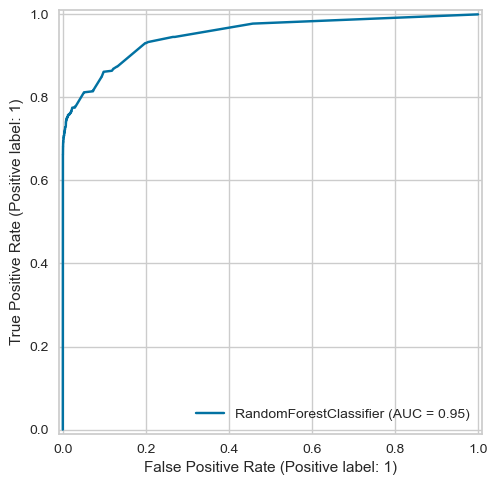

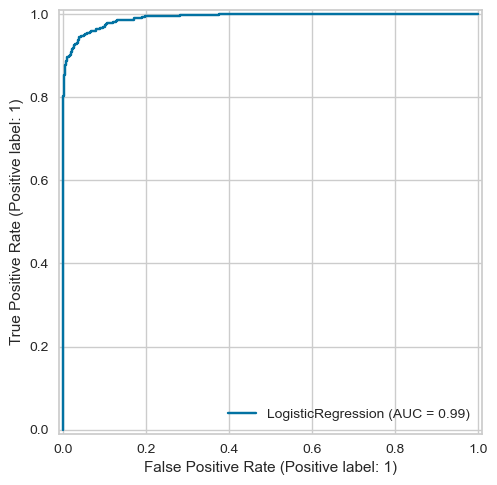

In [33]:
rf_disp = RocCurveDisplay.from_estimator(rf, X_test, y_test)
logit_disp = RocCurveDisplay.from_estimator(logit, X_test_scaled, y_test);

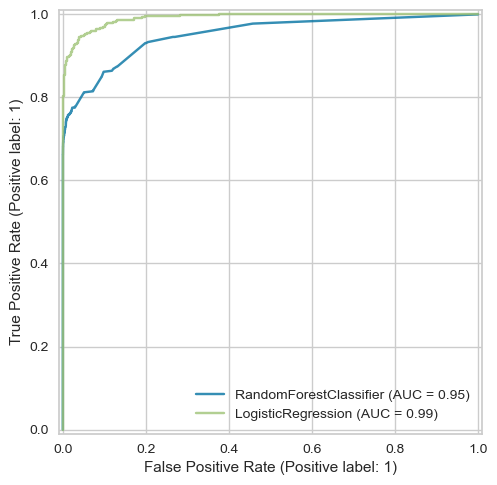

In [34]:
ax = plt.gca()
rf_disp.plot(ax = ax, alpha = 0.8)
logit_disp.plot(ax = ax, alpha = 0.8);

### ROC-AUC with `Yellowbrick`

#### Random Forest

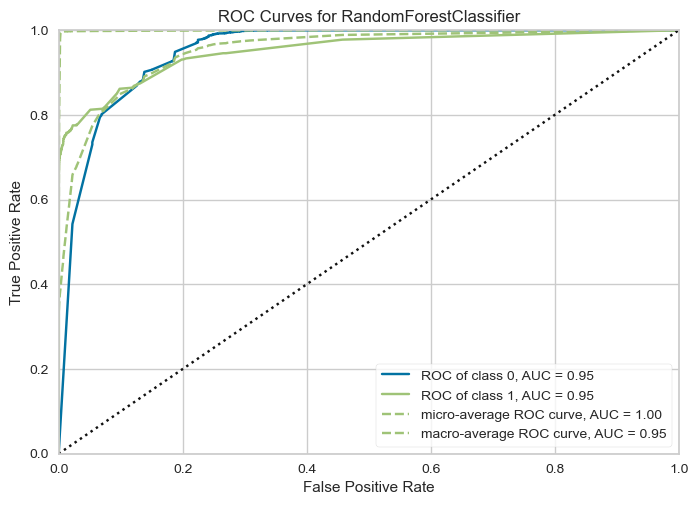

In [35]:
visualizer = ROCAUC(rf, classes = [0,1])

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

#### Logistic Regression

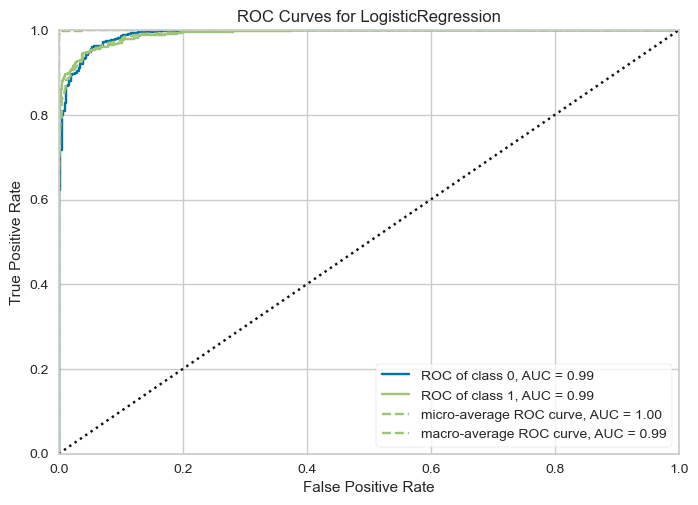

In [36]:
visualizer = ROCAUC(logit, classes= [0, 1])

visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show();

<blockquote>The beauty of Yellowbrick is that it plots a ROC-AUC for the minority class. 

Which is the line that we have in green, and then the ROC-AUC for the majority class, which is line that we have in blue.

This is particularly useful if we have more than `two classes` in our target, because this way we can easily see the performance of our model for each one of the classes in our target.</blockquote>

---